In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [3]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

## Liebre image 1

Normalize image array using to 0-255 using the 95th percentile as the maximum scaling value.

In [4]:
rgb_perc_norm = perc_norm(liebre1_image_path)

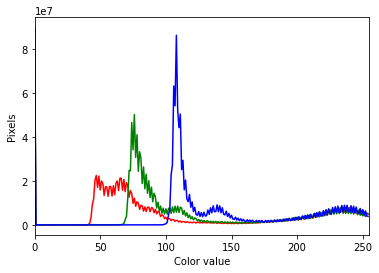

In [5]:
plot_rgb_hist(rgb_perc_norm, 255)

In [5]:
uint8_perc_norm = np.uint8(rgb_perc_norm)

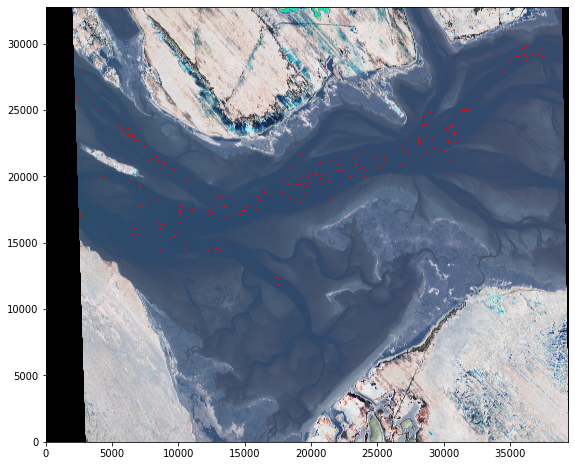

In [7]:
plot_rgb_boxes(liebre1_image_path, liebre1_box_path, uint8_perc_norm)

In [3]:
from src.preprocessing.dataprocessing import convert_coords, save_files, read_coords, get_bbox_info

In [7]:
image = Image.fromarray(uint8_perc_norm)
geo_image = rasterio.open(liebre1_image_path)

In [8]:
info = get_bbox_info(liebre1_box_path, image, geo_image)

In [14]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images"

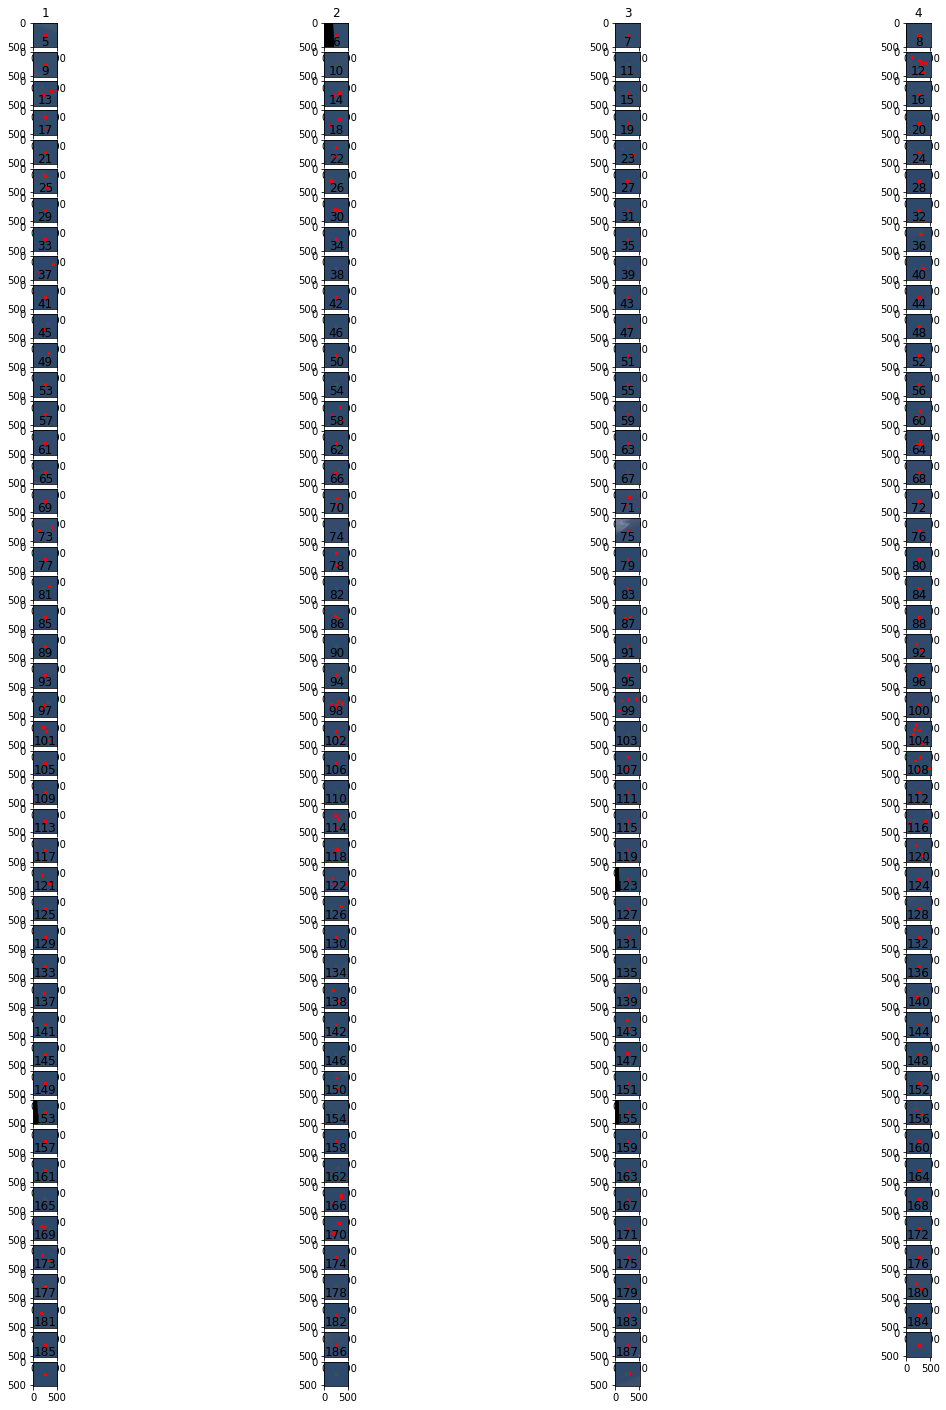

In [20]:
#save_files(image, info, file_save_path, 'liebre1')

In [21]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre1_7.txt"

In [22]:
cropped_image = Image.open(cropped_image_path)

91.0
250.99999999999957
292.99999999999955
383.0
336.0
263.0
378.0


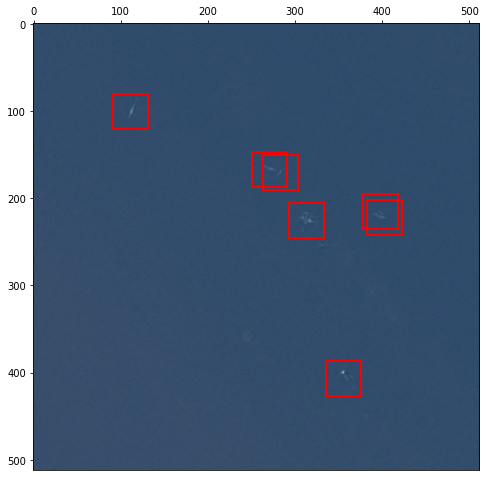

In [25]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## Liebre 2 Image 

In [6]:
liebre2_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre2pansharp.tif"
liebre2_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre2_boxes.geojson"

In [4]:
rgb_perc_norm_l2 = perc_norm(liebre2_image_path)

In [5]:
uint8_perc_norm_l2 = np.uint8(rgb_perc_norm_l2)

In [9]:
image_l2 = Image.fromarray(uint8_perc_norm_l2)
geo_image_l2 = rasterio.open(liebre2_image_path)

In [12]:
info_l2 = get_bbox_info(liebre2_box_path, image_l2, geo_image_l2)

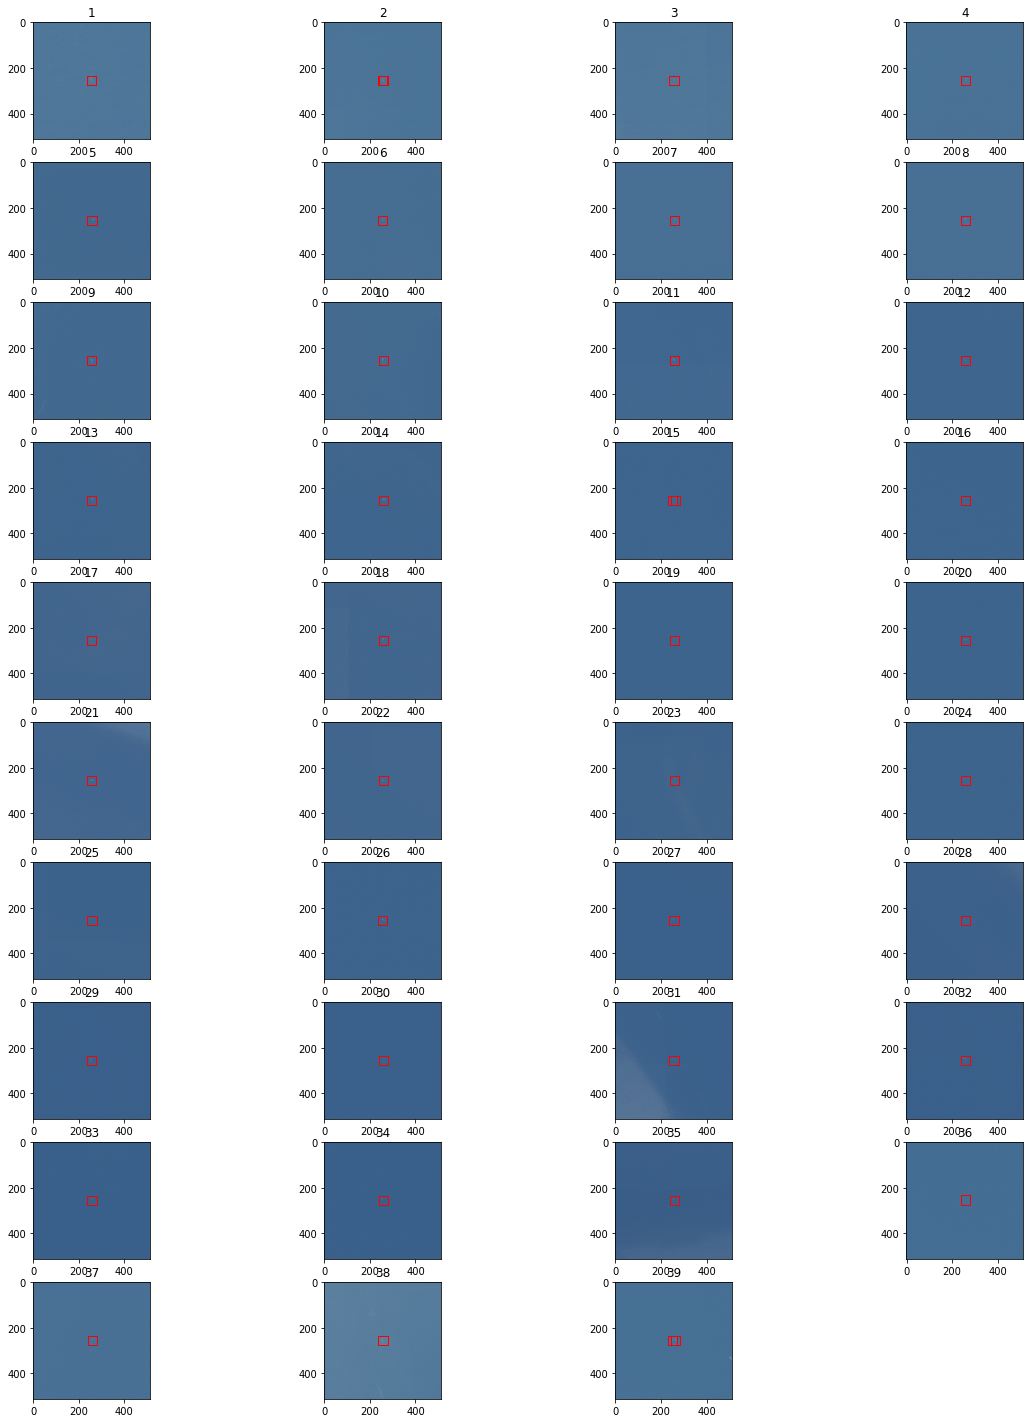

In [15]:
#save_files(image_l2, info_l2, file_save_path, 'liebre2')

In [63]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_13.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_13.txt"

In [64]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

,0,1,2,3,4
0,0,0.503906,0.494141,0.078125,0.078125


In [65]:
cropped_image = Image.open(cropped_image_path)

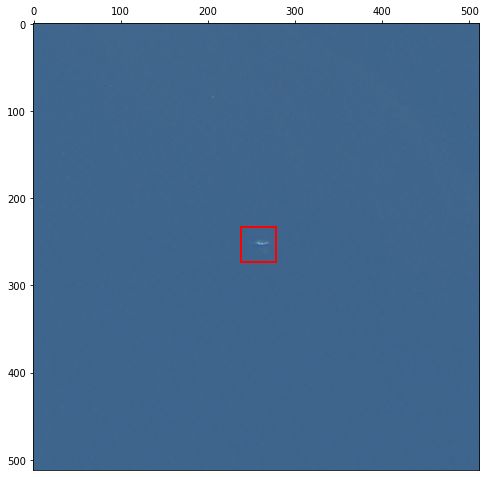

In [66]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## San Ignacio Image

In [15]:
file_save_path_si = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test"

In [14]:
sanig_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_crop_final.tif"
sanig_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_boxes.geojson"

In [5]:
import geopandas
boxes = geopandas.read_file(sanig_box_path)
boxes.head(13)

,Id,Comments,BoL,BoW,BoS,BoC,FlukeP,Blow,Contour,Wake,...,OtherDistu,Fluke,Flipper,Certainty2,CertaintyV,ClassScore,BUFF_DIST,ORIG_FID,ORIG_FID_1,geometry
0,0,"adult, below the surface",1,1,1,1,0,0,0,0,...,2,0,0,Probable,None,5.0,10.0,0,0,"POLYGON ((275873.342 2963594.126, 275873.342 2..."
1,0,"adult, below the surface, with maybe the head ...",2,2,2,2,0,0,0,0,...,1,0,0,Definite,None,7.0,10.0,1,1,"POLYGON ((276033.196 2963729.853, 276033.196 2..."
2,0,"adult below the surface, with maybe its lower ...",2,2,2,2,0,0,0,0,...,0,2,1,Definite,None,12.0,10.0,2,2,"POLYGON ((276275.052 2963441.351, 276275.052 2..."
3,0,adult below the surface,2,2,2,1,0,0,0,0,...,0,0,0,Probable,None,5.5,10.0,3,3,"POLYGON ((275935.369 2963435.760, 275935.369 2..."
4,0,possible mother of mother anc calf pair,2,2,2,2,0,0,0,0,...,0,0,0,Probable,None,6.0,10.0,4,4,"POLYGON ((275678.167 2962915.641, 275678.167 2..."
5,0,adult below the surface,1,2,2,2,0,0,0,0,...,0,0,0,Probable,None,5.0,10.0,5,5,"POLYGON ((276693.713 2962274.849, 276693.713 2..."
6,0,adult below the surface,1,1,1,2,0,0,0,0,...,2,1,0,Definite,None,7.5,10.0,6,6,"POLYGON ((276354.468 2962187.285, 276354.468 2..."
7,0,adult below the surface,2,1,1,1,0,0,0,0,...,2,0,0,Probable,None,6.0,10.0,7,7,"POLYGON ((276356.479 2962217.077, 276356.479 2..."
8,0,adult below the surface (very deep below),1,1,2,2,0,0,0,0,...,0,0,0,Probable,None,4.5,10.0,8,8,"POLYGON ((275982.428 2961799.104, 275982.428 2..."
9,0,adult maybe skyhopping,0,2,0,2,0,0,0,0,...,2,0,0,Possible,None,4.0,10.0,9,9,"POLYGON ((276526.603 2961855.722, 276526.603 2..."


In [6]:
rgb_perc_norm_si = perc_norm(sanig_image_path)

In [7]:
uint8_perc_norm_si = np.uint8(rgb_perc_norm_si)

In [8]:
print(uint8_perc_norm_si.dtype)

uint8


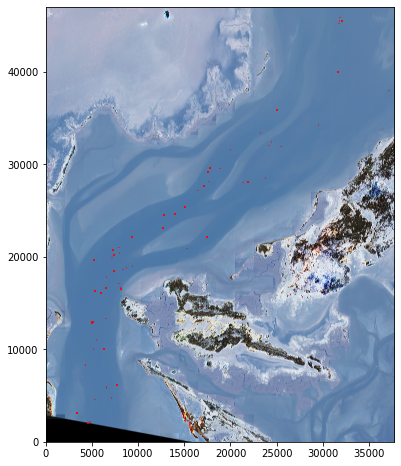

In [9]:
plot_rgb_boxes(sanig_image_path, sanig_box_path, uint8_perc_norm_si)

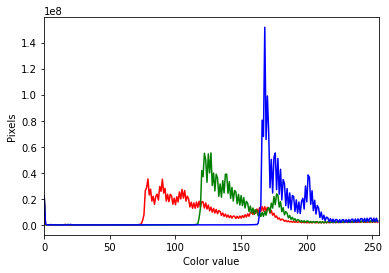

In [10]:
plot_rgb_hist(rgb_perc_norm_si, 255)

In [11]:
image_si = Image.fromarray(uint8_perc_norm_si)
geo_image_si = rasterio.open(sanig_image_path)

In [12]:
info_si = get_bbox_info(sanig_box_path, image_si, geo_image_si)

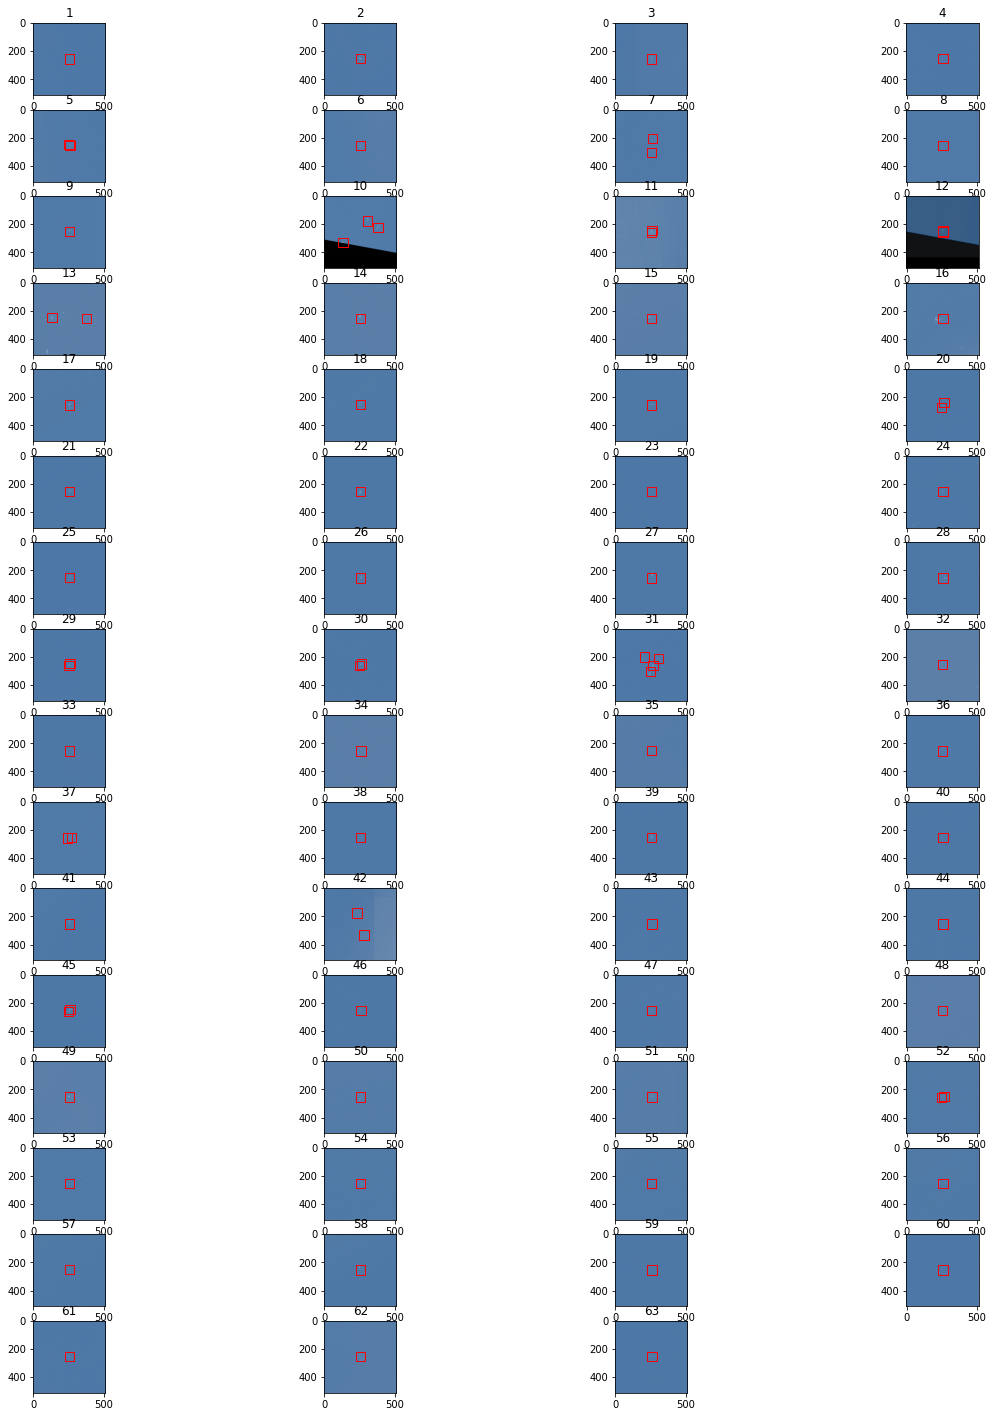

In [16]:
save_files(image_si, info_si, file_save_path_si, 'sanig')

In [23]:
print(type(image_si))

<class 'PIL.Image.Image'>


In [21]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/sanig_10.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/sanig_10.txt"

In [22]:
cropped_image = Image.open(cropped_image_path)

In [23]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

,0,1,2,3,4
0,0,0.500000,0.505859,0.130208,0.130208
1,0,0.503906,0.480469,0.130208,0.130208
2,0,0.500000,0.505859,0.130208,0.130208
3,0,0.503906,0.480469,0.130208,0.130208
4,0,0.500000,0.505859,0.130208,0.130208
5,0,0.503906,0.480469,0.130208,0.130208


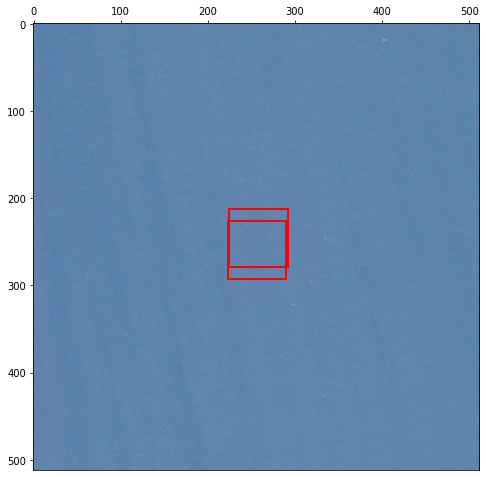

In [24]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()